<a href="https://colab.research.google.com/github/kotatakehara/Self-efficacy/blob/draft/Fact_data_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### すること
2次元における、正規分布を活用した成功率を算出するコードの作成 \\
もっと利便性と可変性があるコードにする ←現在これに着手 \\
widthで行った場合の成功確率が正しいかどうかの確認 \\

---
### 終わったこと
OneDriveのけん玉データをダウンロードせずに常に使用できるようにする←現在これを行っている \\
プログラムの成功失敗の判定などの下地を作成 \\
成功した時と失敗した時の処理を行うコードを書く \\
numpyに変更 \\
クラス化を行う \\


In [1]:
# GoogleドライブをGoogle Colabにマウント
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#pandasをインポート
import glob
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

original_pattern = '/content/drive/MyDrive/kendama_202310_inamura/id01_self/*.csv'
#名前を変更して複数のファイルをループさせるためのコード

# for i in range(1, 11):  # 1から9までの数字でループ
#     # new_number = '{:02d}'.format(i)  # 2桁の数字にフォーマット
#     new_pattern = original_pattern.replace('id01_self', 'id{:02d}_self'.format(i))  # 数字部分を置換
#     Kendama_file_path = glob.glob(new_pattern)

# Kendama_file_path = glob.glob('/content/drive/MyDrive/kendama_202310_inamura/id03_self/*.csv') #すべてのCSVファイルのパスがリストとして取得
# Kendama_file_path = sorted(Kendama_file_path)
# df=pd.read_csv(Kendama_file_path[2],engine='python') #CSVファイルのパスを指定
# df.head()

In [3]:
# #成功した時と失敗した時の処理の分散に対する処理などを行うために、成功と失敗の確認を行うコード
# for index, row in df.iterrows(): #1行目から順番に内容を取得している処理
#   if abs(row['ball.Position.y'] - row['sword.Position.y']) <= 0.1: #玉がplateに乗っているもしくは直前かどうか
#     if (row['ball.Position.x'] - row['sword.Position.x'])**2 + (row['ball.Position.z'] - row['sword.Position.z'])**2 <= (row['ColliderSize']/100)**2: #皿内に玉が入っているかどうか
#       print("成功")
#   if "fail" in Kendama_file_path[1]:
#     succ_check = False
#   else:
#     succ_check = True
# print(succ_check)

In [4]:
class Kendama_analyze():
  def __init__(self, original_pattern, number_people):
    self.original_pattern = original_pattern #ファイルのリンクを格納
    self.number_people = number_people #どれだけのデータ数を使用するかを決定する変数
    self.threshold = {
        'easy': 0.092,
        'normal': 0.07,
        'hard' : 0.048
    }

  #被験者一人の解析を行う関数
  def start_analyze(self, Kendama_file_path,division, pattern):
    #成功した時と失敗した時の処理を行うコード
    dispersion = np.empty((0,2))     #被験者のやる気を表す分散を格納する配列
    Abs_degree_failure = np.array([])
    x = np.array([])  #試行回数を格納
    success = 0
    srate = np.array([])
    succ_check = True
    abs_degree_failure_sum = 0
    variance_x_sum = 0
    variance_y_sum = 0
    success_sum = 0
    difficult = "easy"
    variance_x = 0.01
    variance_y = 0.01
    #他の初期値の宣言を書く（abs_degree_failureなど）
    for i in range(len(Kendama_file_path)):
      data_check = True #dataが正しいのかのチェックを行う。もし、おかしければ１つ前の施工データを使用するようにする
      if "fail" in Kendama_file_path[i]:
        succ_check = False
      else:
        succ_check = True
      df=pd.read_csv(Kendama_file_path[i],engine='python') #CSVファイルのパスを指定

      for index, row in df.iterrows(): #1行目から順番に内容を取得している処理
        if i == 0:
          p = np.array([[row['sword.Position.x'],row['sword.Position.y']]]) #皿のガウス分布の平均値を格納する配列
        if succ_check: #成功した時
          if 0 < row['ball.Position.y'] - row['sword.Position.y'] <= 0.1 and row['ball.Velocity.y'] < 0: #玉がplateに乗っているもしくは直前かどうか
            if abs(np.sqrt((row['ball.Position.x'] - row['sword.Position.x'])**2 + (row['ball.Position.z'] - row['sword.Position.z'])**2)) <= self.threshold[difficult]:
              data_check = False
              p = np.append(p, [[row['sword.Position.x'],row['sword.Position.y']]], axis = 0) #plateの原点を次回の平均値に入れる
              abs_degree_failure = abs(np.sqrt((row['ball.Position.x'] - row['sword.Position.x'])**2 + (row['ball.Position.z'] - row['sword.Position.z'])**2)) #皿の中心と落下位置の差（絶対値）
              abs_degree_failure_sum += abs_degree_failure
              variance_x = (row['sword.Position.x']-p[i][0])**2 #分散を求める一般的な公式である、データから平均を引いて２乗した値を分散にした（値は１つしか使わないので１で割る）←正確に行うなら、一定の差の高さの時の値を全て使うとおそらく良い
              variance_y = (row['sword.Position.y']-p[i][1])**2
              variance_x_sum += variance_x #分散を求める一般的な公式である、データから平均を引いて２乗した値を分散にした（値は１つしか使わないので１で割る）←正確に行うなら、一定の差の高さの時の値を全て使うとおそらく良い
              variance_y_sum += variance_y
              success_sum += 1
              # sigma = sigma/alpha
              break
        else: #失敗した時
          if -0.4 < row['ball.Position.y'] - row['sword.Position.y'] < 0 and row['ball.Velocity.y'] < 0: #玉がplateに乗っているもしくは直前かどうか、そもそも剣よりも上にいっていない場合は論外なので最高到達点が落下地点と一旦考える。※最高到達点の時に皿に近い場合は考えていない
            if abs(np.sqrt((row['ball.Position.x'] - row['sword.Position.x'])**2 + (row['ball.Position.z'] - row['sword.Position.z'])**2)) > self.threshold[difficult]:
              data_check = False
              p = np.append(p, [[row['ball.Position.x'],row['ball.Position.y']]], axis = 0) #玉の落下位置を次回の平均値に入れる
              abs_degree_failure = abs(np.sqrt((row['ball.Position.x'] - row['sword.Position.x'])**2 + (row['ball.Position.z'] - row['sword.Position.z'])**2)) #皿の中心と落下位置の差（絶対値）
              abs_degree_failure_sum += abs_degree_failure
              variance_x = (row['sword.Position.x']-p[i][0])**2 #分散を求める一般的な公式である、データから平均を引いて２乗した値を分散にした（値は１つしか使わないので１で割る）←正確に行うなら、一定の差の高さの時の値を全て使うとおそらく良い
              variance_y = (row['sword.Position.y']-p[i][1])**2 #このコードは分散とは言えない
              variance_x_sum += variance_x #分散を求める一般的な公式である、データから平均を引いて２乗した値を分散にした（値は１つしか使わないので１で割る）←正確に行うなら、一定の差の高さの時の値を全て使うとおそらく良い
              variance_y_sum += variance_y
              # sigma = sigma*beta
              break
      if data_check: #dataに何らかの不備があった場合の応急処置のコード
        p = np.append(p, [p[i]], axis = 0)
        if succ_check:
          abs_degree_failure = self.threshold[difficult]-0.001
        else:
          abs_degree_failure = self.threshold[difficult]+0.001
        abs_degree_failure_sum += abs_degree_failure
        variance_x_sum += variance_x #分散を求める一般的な公式である、データから平均を引いて２乗した値を分散にした（値は１つしか使わないので１で割る）←正確に行うなら、一定の差の高さの時の値を全て使うとおそらく良い
        variance_y_sum += variance_y


      if (i+1)%division == 0: #divisionによっていくつごとに平均を取るか決まる
        dispersion = np.append(dispersion, [[variance_x_sum/division,variance_y_sum/division]], axis=0)
        Abs_degree_failure = np.append(Abs_degree_failure, abs_degree_failure_sum/division)
        abs_degree_failure_sum = 0
        variance_x_sum = 0
        variance_y_sum = 0
        #divisionが１だと0％か１００％になるため例外処理を埋め込んでいる
        if division != 1 or pattern != "default":
          srate = np.append(srate, (success_sum/division)*100)
          success_sum = 0
        else:
          srate = np.append(srate, (success_sum/(i+1))*100)
        x =np.append(x, (i+1)//division)

    # x.append(len(Kendama_file_path))
    p = np.delete(p, 0, axis=0)
    return x,p,dispersion,Abs_degree_failure,srate

  #指定した幅での平均を使った解析
  def divided_analyze(self, division, width, pattern):
    A_x_L = np.empty((0,int(20-width+1)))
    A_p_L = np.empty((0,20-width+1,2))
    A_dispersion_L = np.empty((0,int(20-width+1),2))
    A_Abs_degree_failure_L = np.empty((0,int(20-width+1)))
    A_srate_L = np.empty((0,int(20-width+1)))
    for j in range(1, self.number_people+1):  # 1から10までの数字でループ
      # new_number = '{:02d}'.format(i)  # 2桁の数字にフォーマット
      new_pattern = self.original_pattern.replace('id01_self', 'id{:02d}_self'.format(j))  # 数字部分を置換
      Kendama_file_path = glob.glob(new_pattern)
      Kendama_file_path = sorted(Kendama_file_path) #ファイルの順番がおかしいので並び替えを行うコード

      x,p,dispersion,Abs_degree_failure,srate = self.start_analyze(Kendama_file_path, division, pattern)

      #新しい配列に1つずつずらした5つの値の平均を入れる
      new_x = x[0:(len(x)-width+1)]
      new_p = np.array([np.mean(p[i:i+width, :], axis=0) for i in range(20-width+1)])
      new_dispersion = np.array([np.mean(dispersion[i:i+width, :], axis=0) for i in range(20-width+1)])
      new_Abs_degree_failure = np.array([np.mean(Abs_degree_failure[i:i+width]) for i in range(20-width+1)])
      #確率は要修正（divisionが１の場合累計の成功率になっているため）
      new_srate = np.array([np.mean(srate[i:i+width]) for i in range(20-width+1)])


      A_x_L = np.append(A_x_L, [new_x], axis = 0)
      A_p_L = np.append(A_p_L, [new_p], axis = 0)
      A_dispersion_L = np.append(A_dispersion_L, [new_dispersion], axis = 0)
      A_Abs_degree_failure_L = np.append(A_Abs_degree_failure_L, [new_Abs_degree_failure], axis = 0)
      A_srate_L = np.append(A_srate_L, [new_srate], axis = 0)

    return A_x_L, A_p_L, A_dispersion_L, A_Abs_degree_failure_L, A_srate_L

  #指定した人数分解析のループを行う関数
  def loop_analyze(self, division, pattern):
    A_x_L = np.empty((0,int(20/division)))
    A_p_L = np.empty((0,20,2))
    A_dispersion_L = np.empty((0,int(20/division),2))
    A_Abs_degree_failure_L = np.empty((0,int(20/division)))
    A_srate_L = np.empty((0,int(20/division)))
    for j in range(1, self.number_people+1):  # 1から10までの数字でループ
      # new_number = '{:02d}'.format(i)  # 2桁の数字にフォーマット
      new_pattern = self.original_pattern.replace('id01_self', 'id{:02d}_self'.format(j))  # 数字部分を置換
      Kendama_file_path = glob.glob(new_pattern)
      Kendama_file_path = sorted(Kendama_file_path) #ファイルの順番がおかしいので並び替えを行うコード

      x,p,dispersion,Abs_degree_failure,srate = self.start_analyze(Kendama_file_path,division,pattern)

      A_x_L = np.append(A_x_L, [x], axis = 0)
      A_p_L = np.append(A_p_L, [p], axis = 0) #要素が２１こあるため先頭の要素を削るコードが必要かも？
      A_dispersion_L = np.append(A_dispersion_L, [dispersion], axis = 0)
      A_Abs_degree_failure_L = np.append(A_Abs_degree_failure_L, [Abs_degree_failure], axis = 0)
      A_srate_L = np.append(A_srate_L, [srate], axis = 0)

    return A_x_L, A_p_L, A_dispersion_L, A_Abs_degree_failure_L, A_srate_L


In [5]:
class Kendama_show(Kendama_analyze):
  def __init__(self, original_pattern, number_people):
    super().__init__(original_pattern, number_people)
    self.colors = {
    'srate': 'orange',
    'abs': 'r',
    'dispersion': 'b',
    'R': 'g'
    }

  def make_result(self, division, pattern, width=None):
    if pattern == "default":
      A_x_L, A_p_L, A_dispersion_L, A_Abs_degree_failure_L, A_srate_L = self.loop_analyze(division, pattern)
      return A_x_L, A_p_L, A_dispersion_L, A_Abs_degree_failure_L, A_srate_L
    else:
      A_x_L, A_p_L, A_dispersion_L, A_Abs_degree_failure_L, A_srate_L = self.divided_analyze(division, width,pattern)
      return A_x_L, A_p_L, A_dispersion_L, A_Abs_degree_failure_L, A_srate_L

  def show_result(self, A_x_L, A_p_L, A_dispersion_L, A_Abs_degree_failure_L, A_srate_L, column, division, width):
    # 各データのラベルと色の辞書
    data_dict = {
        "degree failure": {"data": A_Abs_degree_failure_L, "color": 'r', "ylabel": 'degree failure', "ylim": (0, 0.4)},
        "Success rate(%)": {"data": A_srate_L, "color": 'orange', "ylabel": 'Success rate(%)', "ylim": (0, 100)},
        "σ_X,σ_Y": {"data": abs(A_dispersion_L[:,:,0]+A_dispersion_L[:,:,1]), "color": 'green', "ylabel": 'σ_X^2,σ_Y^2', "ylim": (0, 0.06)},
        "σ_X^2": {"data": A_dispersion_L[:,:,0], "color": 'b', "ylabel": 'σ_X^2', "ylim": (0, 0.05)},
        "σ_Y^2": {"data": A_dispersion_L[:,:,1], "color": 'b', "ylabel": 'σ_Y^2', "ylim": (0, 0.05)},

    }

    fig, axs = plt.subplots(column, len(A_x_L), figsize=(40, column*3+1), sharex=True)

    for i in range(self.number_people):
        for j, (label, props) in enumerate(data_dict.items()):
          if j >= column:
            break
          axs[j, i].plot(A_x_L[i], props["data"][i], color=props["color"])
          axs[j, i].set_ylabel(props["ylabel"])
          axs[j, i].set_ylim(props["ylim"])
          axs[j, i].set_xticks(list(range(5, len(A_x_L[i]), 5)))

          # if division == 5:
          #   axs[j, i].set_xticks(np.arange(1, 5*division+1, division))  # [1, 2, 3, 4] if division=5
          # else:
          #   axs[j, i].set_xticks(np.arange(5, max(A_x_L[i])+1, 5*division))  # [5, 10, 15, 20] if division=1

          axs[j, i].set_xlabel("t (times)")

    plt.tight_layout()
    # plt.savefig(f"data_fitting_average.pdf")
    # files.download(f'data_fitting_average.pdf')
    plt.show()


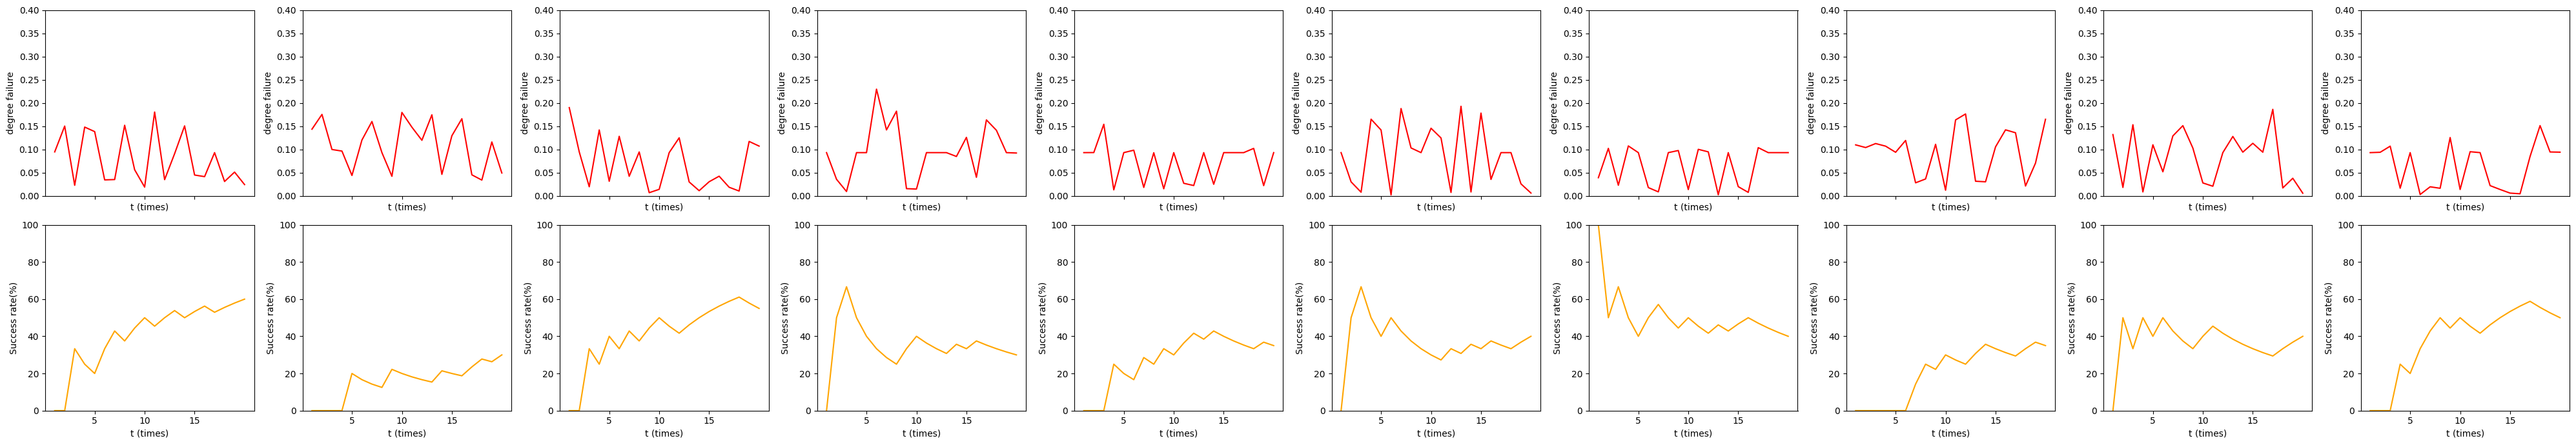

In [6]:
original_pattern = '/content/drive/MyDrive/kendama_202310_inamura/id01_self/*.csv'
number_people = 10
inamura_data_show = Kendama_show(original_pattern, number_people)
division = 1
width = 0
A_x_L, A_p_L, A_dispersion_L, A_Abs_degree_failure_L, A_srate_L = inamura_data_show.make_result(division, "default")
column = 2
inamura_data_show.show_result(A_x_L, A_p_L, A_dispersion_L, A_Abs_degree_failure_L, A_srate_L, column, division, width)

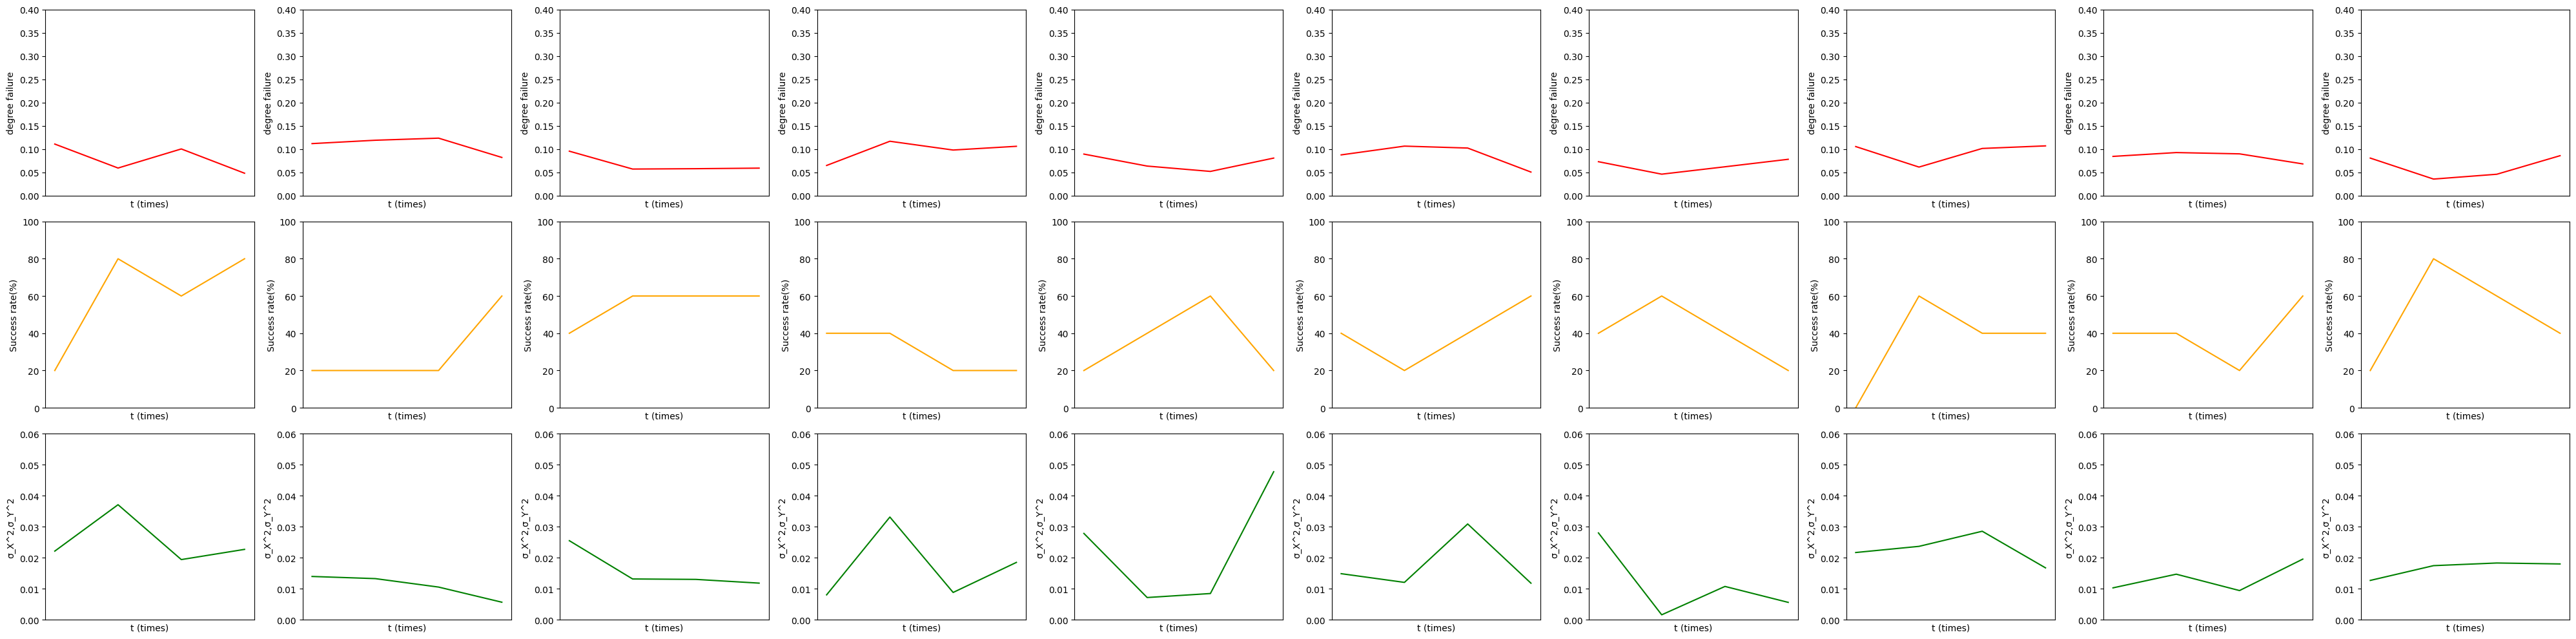

In [7]:
original_pattern = '/content/drive/MyDrive/kendama_202310_inamura/id01_self/*.csv'
number_people = 10
inamura_data_show = Kendama_show(original_pattern, number_people)
width = 0
division = 5
A_x_L, A_p_L, A_dispersion_L, A_Abs_degree_failure_L, A_srate_L = inamura_data_show.make_result(division, "default")
column = 3
inamura_data_show.show_result(A_x_L, A_p_L, A_dispersion_L, A_Abs_degree_failure_L, A_srate_L, column, division, width)

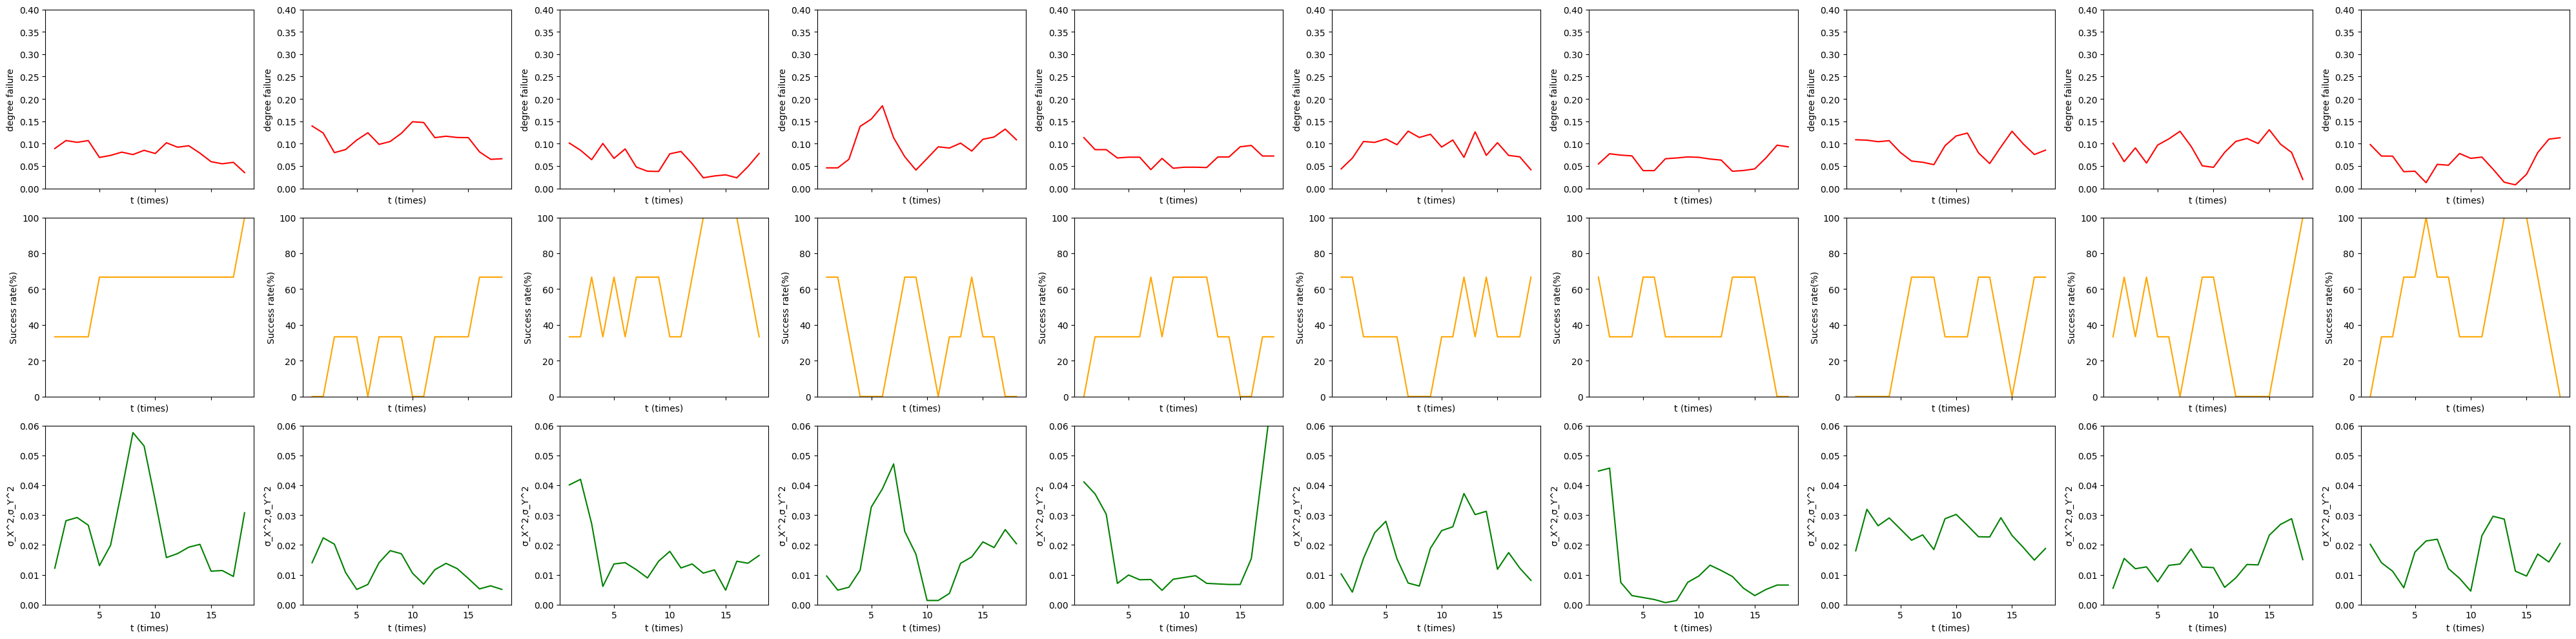

In [8]:
original_pattern = '/content/drive/MyDrive/kendama_202310_inamura/id01_self/*.csv'
number_people = 10
inamura_data_show = Kendama_show(original_pattern, number_people)
division = 1
width = 3
A_x_L, A_p_L, A_dispersion_L, A_Abs_degree_failure_L, A_srate_L = inamura_data_show.make_result(division, "divided", width)
column = 3
inamura_data_show.show_result(A_x_L, A_p_L, A_dispersion_L, A_Abs_degree_failure_L, A_srate_L, column, division, width)

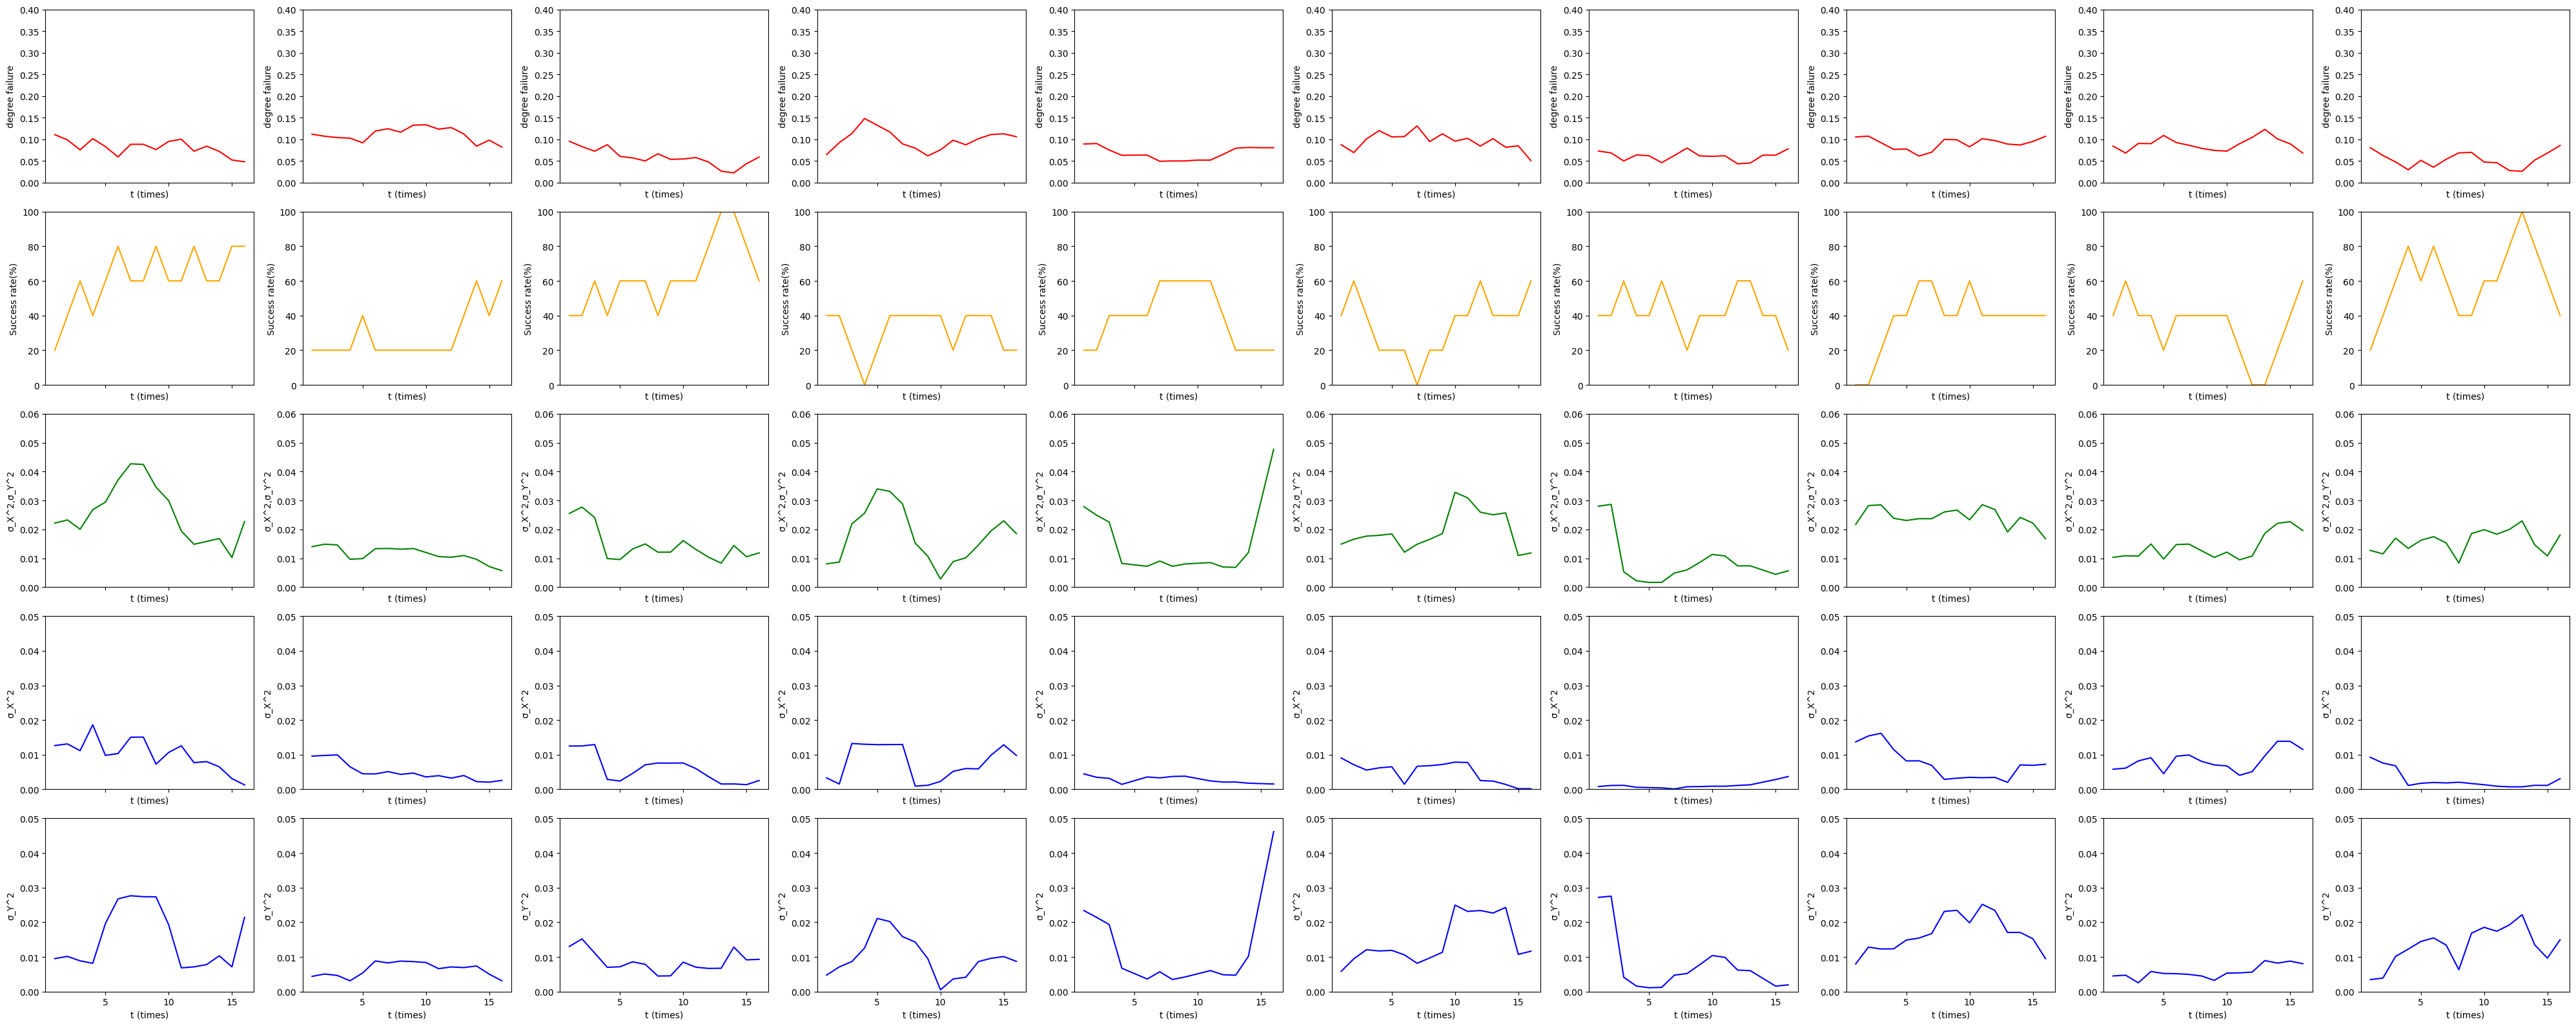

In [9]:
original_pattern = '/content/drive/MyDrive/kendama_202310_inamura/id01_self/*.csv'
number_people = 10
inamura_data_show = Kendama_show(original_pattern, number_people)
division = 1
width = 5
A_x_L, A_p_L, A_dispersion_L, A_Abs_degree_failure_L, A_srate_L = inamura_data_show.make_result(division, "divided", width)
column = 5
inamura_data_show.show_result(A_x_L, A_p_L, A_dispersion_L, A_Abs_degree_failure_L, A_srate_L, column, division, width)

ここから以降は昔のわかりにくいデータを使用する際のフィッテング

In [43]:
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import r2_score
from IPython.display import display, HTML
import scipy.stats as stats

# 単純移動平均(SMA)を計算する関数
def simple_moving_average(values, window):
    return np.convolve(values, np.ones(window) / window, mode='valid')

# モデルの予測関数（分散の動的変化を反映し、幅5の移動平均を使用）
def model(results, alpha, beta, sigma_0):
    sigma_t2 = sigma_0
    sigmas = [sigma_t2]

    # 各試行ごとに分散を更新
    for result in results:
        if result == 1:  # 成功時
            sigma_t2 = sigma_t2 / alpha
        else:  # 失敗時
            sigma_t2 = sigma_t2 * beta
        sigmas.append(sigma_t2)

    sigmas = np.delete(sigmas, 0)
    # 幅5の単純移動平均を計算 (試行の分散に対して)
    sigmas_sma = simple_moving_average(sigmas, 5)
    return sigmas_sma  # 分散の単純移動平均を返す

# 誤差関数の定義（最小化する対象）
def residuals(params, results, y_experiment, sigma_0):
    alpha, beta = params
    y_model = model(results, alpha, beta, sigma_0)

    # 実験データとモデルの移動平均分散の残差を最小化する
    return np.sum((y_experiment[:len(y_model)] - y_model) ** 2)

# 不等式制約: x > 1 なら x - 1 > 0
def constraint(x):
    return x - 1

def parameters_guess(original_pattern, number_people):
  alpha = np.array([])
  beta = np.array([])
  r2_list = np.array([])
  residuals_check_list = np.empty((0,16))
  y_experiment_list = np.empty((0,16))
  y_model_opt_list = np.empty((0,16))
  for j in range(1, number_people+1):  # 1から10までの数字でループ
      # new_number = '{:02d}'.format(i)  # 2桁の数字にフォーマット
      new_pattern = original_pattern.replace('id01_self', 'id{:02d}_self'.format(j))  # 数字部分を置換
      Kendama_file_path = glob.glob(new_pattern)
      Kendama_file_path = sorted(Kendama_file_path) #ファイルの順番がおかしいので並び替えを行うコード
      succ_check_list = np.array([])
      for i in range(len(Kendama_file_path)):
        if "fail" in Kendama_file_path[i]:
            succ_check_list = np.append(succ_check_list, 0)
        else:
            succ_check_list = np.append(succ_check_list, 1)

      # 実験データの観測値
      y_experiment = abs(A_dispersion_L[:,:,0]+A_dispersion_L[:,:,1])[j-1]  # 実際の時系列データ
      sigma_0 = 0.014  # 初期の分散
      # 初期推定値
      initial_guess = [1.0, 1.0]  # α と β の初期推定値

      # 最適化
      bounds = [(1.0, None)]  # 1以上の制約
      constraints = {'type': 'ineq', 'fun': constraint}
      result = minimize(residuals, initial_guess, args=(succ_check_list, y_experiment, sigma_0), bounds=bounds)
      alpha_opt, beta_opt = result.x

      #パラメータ推定の信頼区間
      # 共分散行列を取得 (ヘッセ行列の逆行列)
      cov_matrix = result.hess_inv.todense()  # 共分散行列はヘッセ行列の逆行列

      # 標準誤差（共分散行列の対角成分の平方根）
      std_err_alpha = np.sqrt(cov_matrix[0, 0])
      std_err_beta = np.sqrt(cov_matrix[1, 1])

      # 95%信頼区間の計算
      z_value = 1.96  # 95%信頼区間

      alpha_lower = alpha_opt - z_value * std_err_alpha
      alpha_upper = alpha_opt + z_value * std_err_alpha

      beta_lower = beta_opt - z_value * std_err_beta
      beta_upper = beta_opt + z_value * std_err_beta

      # 信頼区間の出力
      print(f"αの95%信頼区間: [{alpha_lower}, {alpha_upper}]")
      print(f"βの95%信頼区間: [{beta_lower}, {beta_upper}]")

      # print(f"推定されたα: {alpha_opt}, 推定されたβ: {beta_opt}")
      # print(f"最終的な勾配（αの方向、βの方向）: {result.jac[0]:.10f}, {result.jac[1]:.10f}")
      alpha = np.append(alpha,alpha_opt)
      beta = np.append(beta,beta_opt)
      # # 最適化されたモデルによる分散の移動平均
      y_model_opt = model(succ_check_list, alpha_opt, beta_opt, sigma_0)
      # print("モデルによる分散の移動平均:", y_model_opt)
      # print("実験データ:", y_experiment[:len(y_model_opt)])

      y_experiment_list = np.append(y_experiment_list, [y_experiment], axis=0)
      y_model_opt_list = np.append(y_model_opt_list, [y_model_opt], axis=0)

      # 残差の計算
      residuals_check = y_experiment - y_model_opt

      residuals_check_list = np.append(residuals_check_list, [residuals_check], axis=0)

      # 決定係数 R^2 の計算
      r2 = r2_score(y_experiment, y_model_opt)
      r2_list = np.append(r2_list, r2)
      # print(f"決定係数 R^2: {r2}")

  return alpha, beta, y_experiment_list, y_model_opt_list, residuals_check_list, r2_list

original_pattern = '/content/drive/MyDrive/kendama_202310_inamura/id01_self/*.csv'
number_people = 10
alpha, beta, y_experiment_list, y_model_opt_list, residuals_check_list, r2_list = parameters_guess(original_pattern, number_people)

# データをリストとしてまとめる
data = {
    "推定されたα": alpha,
    "推定されたβ": beta,
    "決定係数 R^2": r2_list
}

# データフレーム作成
df = pd.DataFrame(data)
# 小数点10桁に設定
pd.set_option('display.float_format', lambda x: f'{x:.10f}')

# 被験者番号を追加
df.index = range(1, len(df) + 1)
df.index.name = "被験者番号"

# データフレームをHTMLテーブルとして表示（被験者番号付き）
display(HTML(df.to_html(index=True)))



αの95%信頼区間: [-9.25510019942004, 11.74758614784121]
βの95%信頼区間: [-9.726524504908523, 12.46709588525369]
αの95%信頼区間: [-83.26945090377964, 85.8003720374783]
βの95%信頼区間: [-15.759692189355462, 17.82082589031073]
αの95%信頼区間: [-25.593969953291886, 27.927610522657144]
βの95%信頼区間: [-21.61741166524061, 23.911434298184616]
αの95%信頼区間: [-174.38830200251468, 185.75099851222583]
βの95%信頼区間: [-38.48774502519942, 43.22855788893089]
αの95%信頼区間: [-23.600150316127767, 25.90927946220267]
βの95%信頼区間: [-11.666093588378951, 13.872848533875358]
αの95%信頼区間: [-53.762928683162166, 56.3702437535488]
βの95%信頼区間: [-25.55589011569802, 27.957908433100634]
αの95%信頼区間: [-155.96616343766962, 158.44571937278064]
βの95%信頼区間: [-120.60084318537375, 122.77886401767171]
αの95%信頼区間: [-14.6988783044086, 17.15054006035255]
βの95%信頼区間: [-5.051915239242728, 7.357697203718958]
αの95%信頼区間: [-58.0254015263995, 60.99679852390832]
βの95%信頼区間: [-24.902042108265267, 27.40959316444089]
αの95%信頼区間: [-0.96, 2.96]
βの95%信頼区間: [-3.213848479558067, 5.266503285864

,推定されたα,推定されたβ,決定係数 R^2
被験者番号,,,
1,1.2462429742,1.3702856902,0.2779690726
2,1.2654605668,1.0305668505,0.6321951841
3,1.1668202847,1.1470113165,0.1998538517
4,5.6813482549,2.3704064319,0.5126754380
5,1.1545645730,1.1033774727,0.0549672033
6,1.3036575352,1.2010091587,0.1690602536
7,1.2397779676,1.0890104161,0.1756748957
8,1.2258308780,1.1528909822,0.0101960432
9,1.4856984988,1.2537755281,0.6962063938


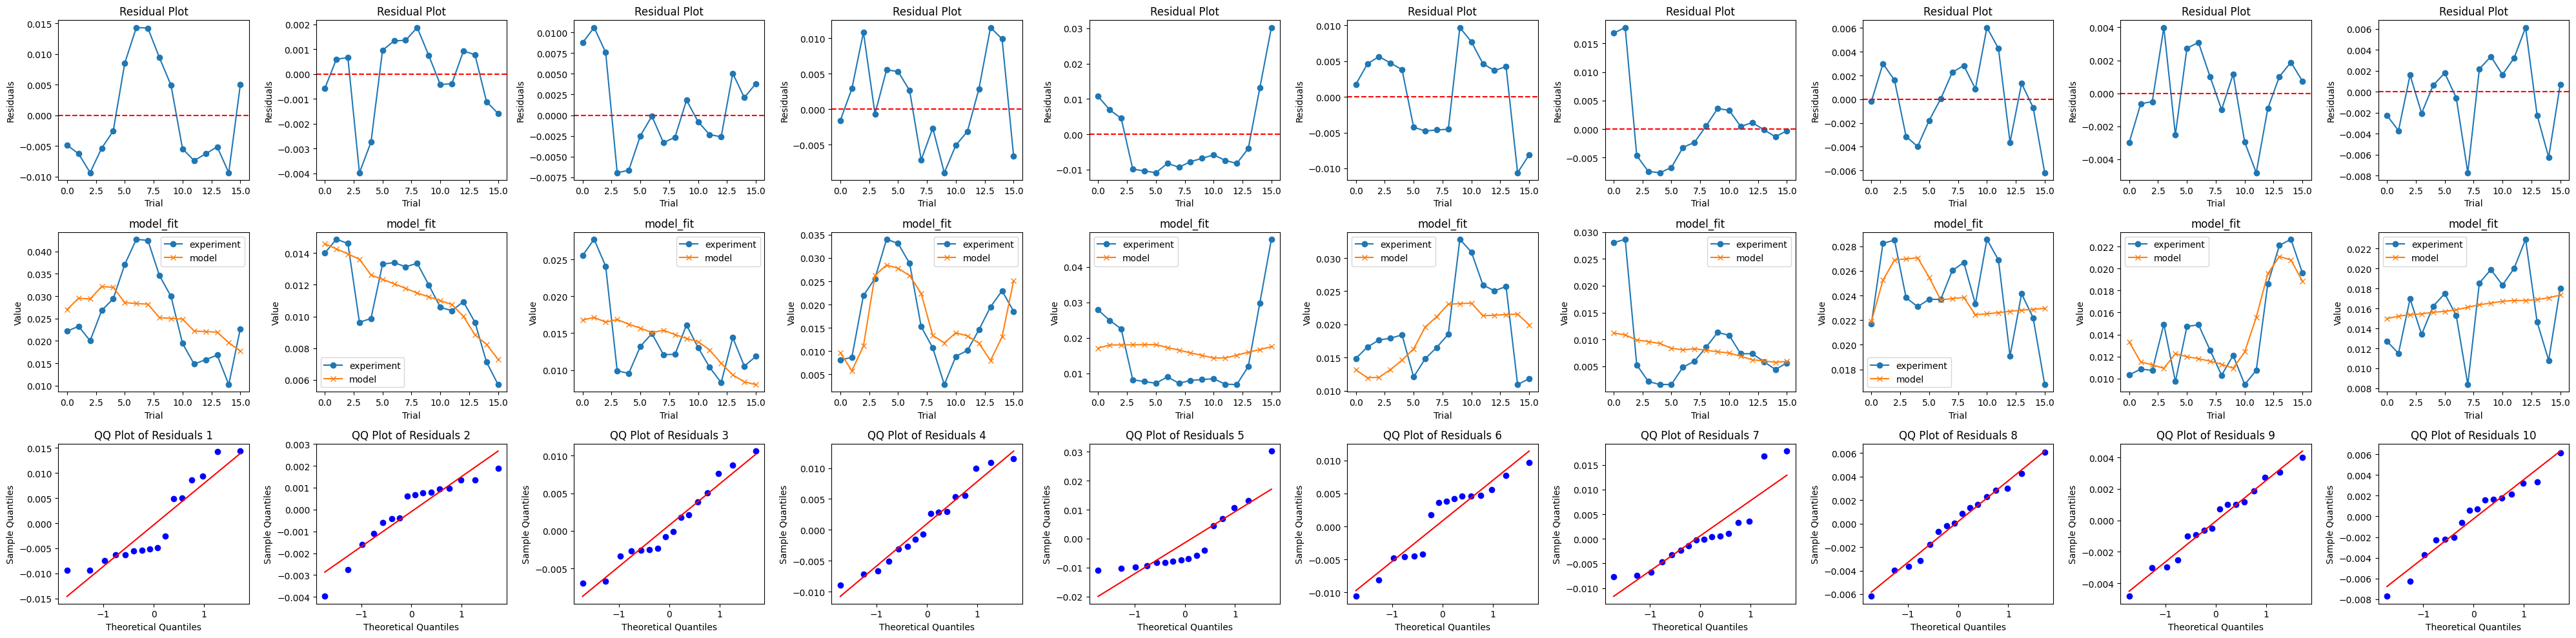

In [38]:
# 可変行列設定
n_rows = 3  # 行数
n_cols = 10  # 列数

# Figureを設定
fig, axes = plt.subplots(n_rows, n_cols, figsize=(40, n_rows*3+1))

# 残差のプロット (1行目に配置)
for i in range(n_cols):
    ax = axes[0, i]
    ax.plot(residuals_check_list[i], marker='o')
    ax.set_title('Residual Plot')
    ax.set_xlabel('Trial')
    ax.set_ylabel('Residuals')
    ax.axhline(0, color='red', linestyle='--')

# モデル予測値と実験データのプロット (2行目に配置)
for i in range(n_cols):
    ax = axes[1, i]
    ax.plot(y_experiment_list[i], label='experiment', marker='o')
    ax.plot(y_model_opt_list[i], label='model', marker='x')
    ax.set_title('model_fit')
    ax.set_xlabel('Trial')
    ax.set_ylabel('Value')
    ax.legend()

for i in range(n_cols):
    ax = axes[2, i]
    stats.probplot(residuals_check_list[i], dist="norm", plot=ax)
    ax.set_title(f"QQ Plot of Residuals {i+1}")
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')

# グラフを調整して表示
plt.tight_layout()
plt.show()
